In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42) #changing the loss function from log to hinge can improve the performance
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

In [15]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


In [18]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42) #changing the loss function from log to hinge can improve the performance
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

['mean perimeter' 'mean area']


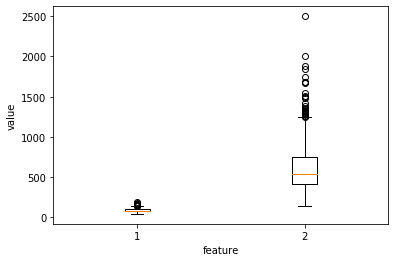

In [22]:
import matplotlib.pyplot as plt
import numpy as np
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [0]:
class SingleLayer:
  
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses =[]
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(slef, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0],1)), x]

  def activation(self, z):
    a= 1/(1+np.exp(-z))
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b =0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z= self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i]-a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= self.lr*w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
  
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [38]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


0.9120879120879121

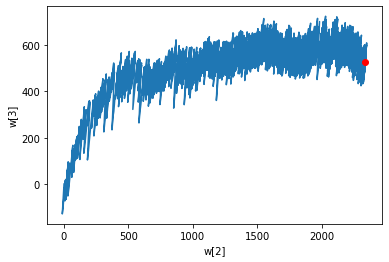

In [39]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [0]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train- train_mean)/train_std

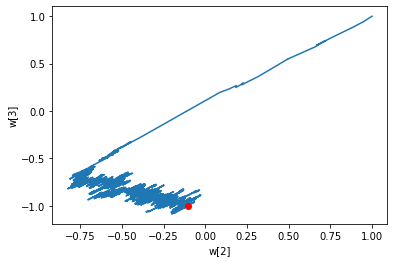

In [41]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [42]:
layer2.score(x_val, y_val)

0.37362637362637363

In [43]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val- val_mean)/val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

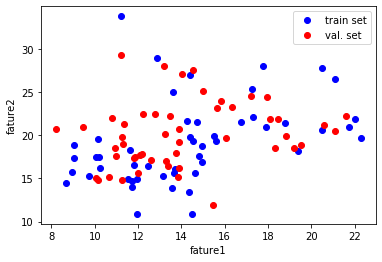

In [44]:
plt.plot(x_train[:50, 0],x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0],x_val[:50, 1], 'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val. set'])
plt.show()